In [1]:
!pip install kaggle


   -------------------------- ------------- 2/3 [kaggle]
   -------------------------- ------------- 2/3 [kaggle]
   ---------------------------------------- 3/3 [kaggle]



In [9]:
!dir

 Volume in drive E is New Volume
 Volume Serial Number is 7071-2DA0

 Directory of E:\DeepLearning

08/29/2025  10:28 PM    <DIR>          .
08/29/2025  10:19 PM                73 .gitignore
08/29/2025  10:27 PM    <DIR>          .ipynb_checkpoints
08/29/2025  10:18 PM    <DIR>          datasets
08/29/2025  10:28 PM           359,678 hocSau.ipynb
               2 File(s)        359,751 bytes
               3 Dir(s)  68,892,106,752 bytes free


In [12]:
import zipfile
import os

zip_path = r"E:\DeepLearning\datasets\plant-pathology-2020-fgvc7.zip"
extract_path = r"E:\DeepLearning\datasets"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Giải nén xong!


In [13]:
print(os.listdir(extract_path))

['images', 'plant-pathology-2020-fgvc7.zip', 'sample_submission.csv', 'test.csv', 'train.csv']


In [16]:
import pandas as pd
import os

train_csv = r"E:\DeepLearning\datasets\train.csv"
train_df = pd.read_csv(train_csv)

print("Số lượng mẫu:", len(train_df))
print(train_df.head())

Số lượng mẫu: 1821
  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0


Ảnh đầu tiên: E:\DeepLearning\datasets\images\Train_0.jpg


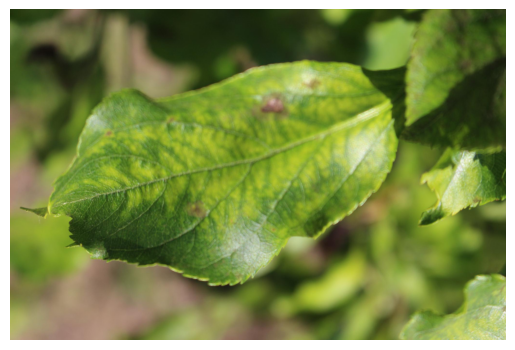

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

train_csv = r"E:\DeepLearning\datasets\train.csv"
images_path = r"E:\DeepLearning\datasets\images"

train_df = pd.read_csv(train_csv)

first_img = os.path.join(images_path, train_df.iloc[0, 0] + ".jpg")
print("Ảnh đầu tiên:", first_img)

img = Image.open(first_img)

plt.imshow(img)
plt.axis("off")  # tắt trục
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from skimage.io import imread
from skimage.transform import resize

data_path = r"E:\DeepLearning\datasets\plant-pathology-2020-fgvc7"
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))

X = []
y = []

for idx, row in train_df.iterrows():
    img_path = os.path.join(data_path, "images", row["image_id"] + ".jpg")
    img = imread(img_path)
    img_resized = resize(img, (64, 64)).flatten()   # resize & flatten
    X.append(img_resized)
    # Lấy nhãn
    label = row[1:].idxmax()  # cột có giá trị 1
    y.append(label)

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)
print("Shape y:", y.shape)

In [ ]:
# ---- Giảm chiều bằng PCA ----
pca = PCA(n_components=100)  # giảm xuống 100 chiều
X_pca = pca.fit_transform(X)

# ---- Train/test split ----
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
# ---- Logistic Regression ----
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred))

In [ ]:
# ---- Random Forest ----
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred))

In [5]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred))


NameError: name 'X_train' is not defined